In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import utilities as utl
import msmio as mio
import os
import subprocess as sbp

In [2]:
sns.set()
sns.set(
    context     = 'talk', 
    style       = 'white', 
    font        = 'serif', 
    palette     = 'muted', 
    color_codes = True
)
sns.set_palette('Set2')
cmt = plt.cm.Set2(np.linspace(0, 1, 8))

In [3]:
def toRadPerSec(rpm):
    return 2 * np.pi * rpm / 60.

def toLinearVelocity(omega, radius):
    return omega * radius

In [4]:
gebt_name_out = [
    'x1', 'x2', 'x3', 
    'u1', 'u2', 'u3', 'r1', 'r2', 'r3', 
    'f1', 'f2', 'f3', 'm1', 'm2', 'm3',
    'p1', 'p2', 'p3', 'h1', 'h2', 'h3'
]

In [5]:
rpm = 250
r = 2.5

av = toRadPerSec(rpm)
print av
lv = toLinearVelocity(av, r)
print lv

26.1799387799
65.4498469498


---

## Static

In [6]:
st_out = mio.readGEBTOut('rotatingbeam_static.dat')
[st_out_ps, st_out_ms] = st_out[0]
df_st_out_ns = pd.DataFrame([st_out_ps[0],], columns=gebt_name_out[:15])
for i in range(len(st_out_ms)):
    df_temp = pd.DataFrame(st_out_ms[i], columns=gebt_name_out[:15])
    df_st_out_ns = pd.concat([df_st_out_ns, df_temp], ignore_index=True)
    df_temp = pd.DataFrame([st_out_ps[i+1],], columns=gebt_name_out[:15])
    df_st_out_ns = pd.concat([df_st_out_ns, df_temp], ignore_index=True)

df_st_out_ns['x1p'] = df_st_out_ns['x1'] + df_st_out_ns['u1']
df_st_out_ns['x2p'] = df_st_out_ns['x2'] + df_st_out_ns['u2']
df_st_out_ns['x3p'] = df_st_out_ns['x3'] + df_st_out_ns['u3']
display(df_st_out_ns[:10])

,x1,x2,x3,u1,u2,u3,r1,r2,r3,f1,f2,f3,m1,m2,m3,x1p,x2p,x3p
0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,5.573186e-21,-100.000000,0.0,0.0,0.0,-2700.9718,0.000000,0.000000,0.0
1,0.7875,0.0,0.0,-0.000552,-0.029599,0.0,0.0,0.0,-0.037120,3.711089e+00,-99.931115,0.0,0.0,0.0,-2622.2770,0.786948,-0.029599,0.0
2,2.3625,0.0,0.0,-0.005823,-0.145398,0.0,0.0,0.0,-0.109231,1.089873e+01,-99.404314,0.0,0.0,0.0,-2465.3041,2.356677,-0.145398,0.0
3,3.9375,0.0,0.0,-0.022896,-0.370660,0.0,0.0,0.0,-0.177160,1.761209e+01,-98.436855,0.0,0.0,0.0,-2309.5114,3.914604,-0.370660,0.0
4,5.5125,0.0,0.0,-0.058022,-0.697849,0.0,0.0,0.0,-0.241044,2.384338e+01,-97.115874,0.0,0.0,0.0,-2155.5240,5.454478,-0.697849,0.0
5,7.0875,0.0,0.0,-0.116138,-1.119368,0.0,0.0,0.0,-0.300988,2.959233e+01,-95.521170,0.0,0.0,0.0,-2003.8356,6.971362,-1.119368,0.0
6,8.6625,0.0,0.0,-0.200978,-1.627663,0.0,0.0,0.0,-0.357071,3.486466e+01,-93.725428,0.0,0.0,0.0,-1854.8195,8.461522,-1.627663,0.0
7,10.2375,0.0,0.0,-0.315186,-2.215308,0.0,0.0,0.0,-0.409348,3.967080e+01,-91.794484,0.0,0.0,0.0,-1708.7404,9.922314,-2.215308,0.0
8,11.8125,0.0,0.0,-0.460422,-2.875071,0.0,0.0,0.0,-0.457859,4.402484e+01,-89.787600,0.0,0.0,0.0,-1565.7640,11.352078,-2.875071,0.0
9,13.3875,0.0,0.0,-0.637462,-3.599963,0.0,0.0,0.0,-0.502631,4.794345e+01,-87.757764,0.0,0.0,0.0,-1425.9680,12.750038,-3.599963,0.0


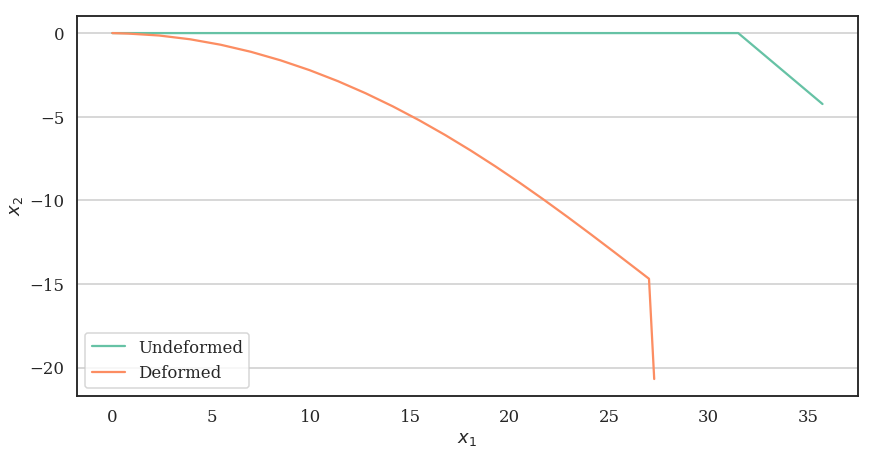

In [7]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot('x1', 'x2', data=df_st_out_ns, label='Undeformed')
ax.plot('x1p', 'x2p', data=df_st_out_ns, label='Deformed')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(axis='y')
ax.legend()
plt.show()

---

## Steady State

In [8]:
rpms = [250, 500, 750]
df_ss_out_nss = []
for i in range(len(rpms)):
    rpm = rpms[i]
    fn = 'rotatingbeam_rpm' + str(rpm) + '_steadystate.dat'
    ss_out = mio.readGEBTOut(fn)
    [ss_out_ps, ss_out_ms] = ss_out[0]
    df_ss_out_ns = pd.DataFrame([ss_out_ps[0],], columns=gebt_name_out[:15])
    for i in range(len(ss_out_ms)):
        df_temp = pd.DataFrame(ss_out_ms[i], columns=gebt_name_out)
        df_ss_out_ns = pd.concat(
            [df_ss_out_ns, df_temp.loc[:, gebt_name_out[:15]]], ignore_index=True
        )
        df_temp = pd.DataFrame([ss_out_ps[i+1],], columns=gebt_name_out[:15])
        df_ss_out_ns = pd.concat([df_ss_out_ns, df_temp], ignore_index=True)

    df_ss_out_ns['x1p'] = df_ss_out_ns['x1'] + df_ss_out_ns['u1']
    df_ss_out_ns['x2p'] = df_ss_out_ns['x2'] + df_ss_out_ns['u2']
    df_ss_out_ns['x3p'] = df_ss_out_ns['x3'] + df_ss_out_ns['u3']
    df_ss_out_nss.append(df_ss_out_ns)
display(df_ss_out_nss[0][:10])

,x1,x2,x3,u1,u2,u3,r1,r2,r3,f1,f2,f3,m1,m2,m3,x1p,x2p,x3p
0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.684245,-103.056990,0.0,0.0,0.0,-2699.7753,0.000000,0.000000,0.0
1,0.7875,0.0,0.0,-0.000542,-0.029573,0.0,0.0,0.0,-0.037073,11.470532,-102.702170,0.0,0.0,0.0,-2618.9004,0.786958,-0.029573,0.0
2,2.3625,0.0,0.0,-0.005777,-0.145198,0.0,0.0,0.0,-0.109032,18.752938,-101.618250,0.0,0.0,0.0,-2458.0060,2.356723,-0.145198,0.0
3,3.9375,0.0,0.0,-0.022754,-0.369970,0.0,0.0,0.0,-0.176707,25.477551,-100.132310,0.0,0.0,0.0,-2299.1388,3.914746,-0.369970,0.0
4,5.5125,0.0,0.0,-0.057654,-0.696224,0.0,0.0,0.0,-0.240257,31.646901,-98.337996,0.0,0.0,0.0,-2142.8580,5.454846,-0.696224,0.0
5,7.0875,0.0,0.0,-0.115333,-1.116271,0.0,0.0,0.0,-0.299805,37.270393,-96.319511,0.0,0.0,0.0,-1989.5825,6.972167,-1.116271,0.0
6,8.6625,0.0,0.0,-0.199441,-1.622502,0.0,0.0,0.0,-0.355447,42.362655,-94.152174,0.0,0.0,0.0,-1839.6055,8.463059,-1.622502,0.0
7,10.2375,0.0,0.0,-0.312546,-2.207467,0.0,0.0,0.0,-0.407254,46.942143,-91.902971,0.0,0.0,0.0,-1693.1084,9.924954,-2.207467,0.0
8,11.8125,0.0,0.0,-0.456239,-2.863937,0.0,0.0,0.0,-0.455280,51.029943,-89.631095,0.0,0.0,0.0,-1550.1732,11.356261,-2.863937,0.0
9,13.3875,0.0,0.0,-0.631243,-3.584943,0.0,0.0,0.0,-0.499562,54.648743,-87.388485,0.0,0.0,0.0,-1410.7943,12.756257,-3.584943,0.0


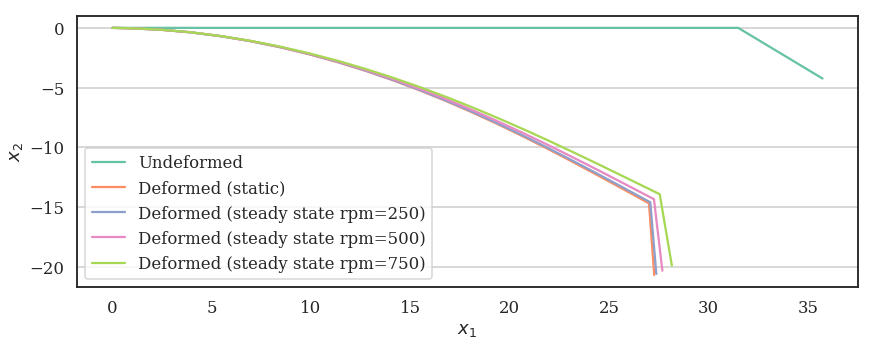

In [9]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot('x1', 'x2', data=df_st_out_ns, label='Undeformed')
ax.plot('x1p', 'x2p', data=df_st_out_ns, label='Deformed (static)')

for i in range(len(rpms)):
    rpm = rpms[i]
    ax.plot(
        'x1p', 'x2p', data=df_ss_out_nss[i], 
        label='Deformed (steady state rpm={0:d})'.format(rpm)
    )

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(axis='y')
ax.legend(frameon=True)
plt.show()

---

## Transient

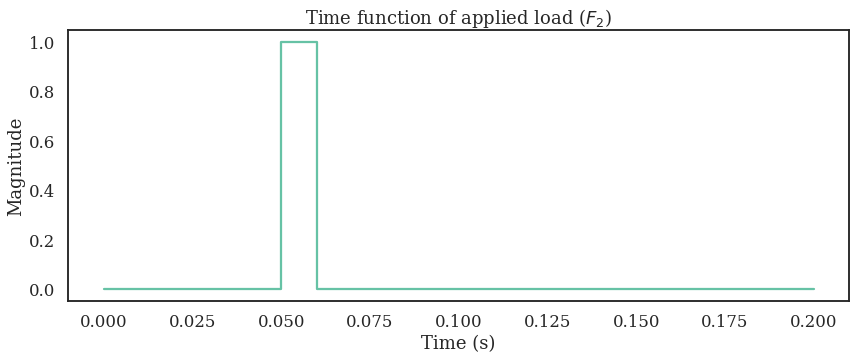

In [40]:
t = [0., 0.050, 0.050, 0.060, 0.060, 0.2]
f = [0., 0., 1., 1., 0., 0.]

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(t, f)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Magnitude')
ax.set_title(r'Time function of applied load ($F_2$)')
plt.show()

In [38]:
tr_out = mio.readGEBTOut('rotatingbeam_rpm000_transient_forced_squared_3.dat')
nstep = len(tr_out)
point = 2
member = 1
element = 1
df_tr_out_steps = []
for s in range(nstep):
    [tr_out_ps, tr_out_ms] = tr_out[s]
    df_tr_out_ns = pd.DataFrame([tr_out_ps[point-1],], columns=gebt_name_out[:15])
    df_tr_out_ns['x1p'] = df_tr_out_ns['x1'] + df_tr_out_ns['u1']
    df_tr_out_ns['x2p'] = df_tr_out_ns['x2'] + df_tr_out_ns['u2']
    df_tr_out_ns['x3p'] = df_tr_out_ns['x3'] + df_tr_out_ns['u3']
    df_tr_out_steps.append(df_tr_out_ns)
df_tr_out_steps = pd.concat(df_tr_out_steps, ignore_index=True)
display(df_tr_out_steps[:10])

,x1,x2,x3,u1,u2,u3,r1,r2,r3,f1,f2,f3,m1,m2,m3,x1p,x2p,x3p
0,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0
1,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0
2,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0
3,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0
4,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0
5,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0
6,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0
7,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0
8,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0
9,31.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.5,0.0,0.0


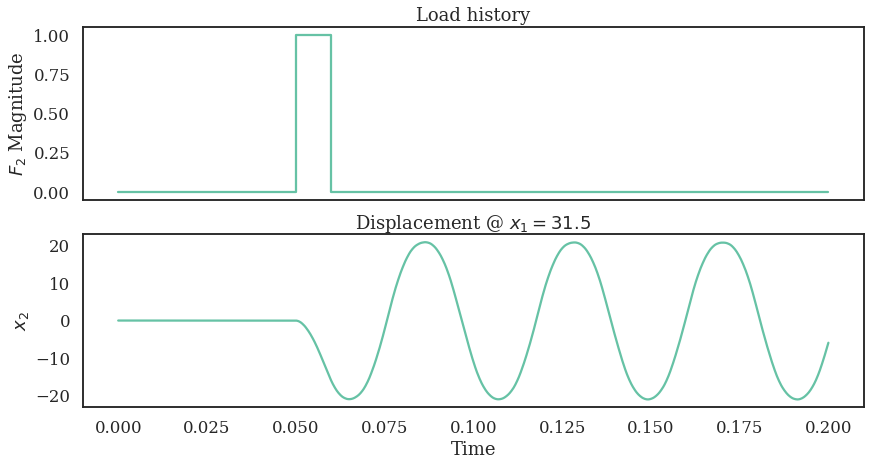

In [46]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(14, 7))

xs = np.linspace(t[0], t[-1], nstep)

axs[0].plot(t, f)
# axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel(r'$F_2$ Magnitude')
axs[0].set_title('Load history')

axs[1].plot(xs, df_tr_out_steps['x2p'])
axs[1].set_xlabel('Time')
axs[1].set_ylabel('$x_2$')
axs[1].set_title(r'Displacement @ $x_1 = 31.5$')

plt.show()

---

## Eigen-analysis

In [13]:
[eva_out, eve_out] = mio.readGEBTOutEigen('rotatingbeam_rpm000_eigen_free.dat')
nev = len(eva_out)

In [14]:
evi = 1

evai_out = eva_out[evi-1]
evei_out = eve_out[evi-1]

[evei_out_ps, evei_out_ms] = evei_out
df_evei_out_ns = pd.DataFrame([evei_out_ps[0],], columns=gebt_name_out[:15])
for i in range(len(evei_out_ms)):
    df_temp = pd.DataFrame(evei_out_ms[i], columns=gebt_name_out)
    df_evei_out_ns = pd.concat(
        [df_evei_out_ns, df_temp.loc[:, gebt_name_out[:15]]], ignore_index=True
    )
    df_temp = pd.DataFrame([evei_out_ps[i+1],], columns=gebt_name_out[:15])
    df_evei_out_ns = pd.concat([df_evei_out_ns, df_temp], ignore_index=True)

df_evei_out_ns['x1p'] = df_evei_out_ns['x1'] + df_evei_out_ns['u1']
df_evei_out_ns['x2p'] = df_evei_out_ns['x2'] + df_evei_out_ns['u2']
df_evei_out_ns['x3p'] = df_evei_out_ns['x3'] + df_evei_out_ns['u3']
# df_evei_out_nss.append(df_evei_out_ns)

print type(evi)
print type(evai_out[1])

display(df_evei_out_ns[:10])

<type 'int'>
<type 'float'>


,x1,x2,x3,u1,u2,u3,r1,r2,r3,f1,f2,f3,m1,m2,m3,x1p,x2p,x3p
0,0.0000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.286357e-15,-2.112959e-14,-0.006735,0.00522,0.180399,-5.565285e-13,0.0000,0.000000e+00,0.000000
1,0.7875,0.0,0.0,-4.960344e-18,-4.542249e-18,-0.000492,0.000013,0.000624,-1.289056e-17,2.305366e-15,-2.054240e-14,-0.006734,0.00522,0.175095,-5.392810e-13,0.7875,-4.542249e-18,-0.000492
2,2.3625,0.0,0.0,4.818145e-18,-3.204094e-17,-0.002429,0.000039,0.001835,-2.798727e-17,2.318249e-15,-1.989356e-14,-0.006731,0.00522,0.164492,-5.042619e-13,2.3625,-3.204094e-17,-0.002429
3,3.9375,0.0,0.0,-2.694676e-18,-7.892899e-17,-0.006214,0.000064,0.002970,-3.902183e-17,3.095762e-15,-2.058190e-14,-0.006721,0.00522,0.153898,-4.700456e-13,3.9375,-7.892899e-17,-0.006214
4,5.5125,0.0,0.0,5.456129e-18,-1.383056e-16,-0.011727,0.000090,0.004030,-4.674766e-17,2.554647e-15,-2.154259e-14,-0.006701,0.00522,0.143328,-4.347284e-13,5.5125,-1.383056e-16,-0.011727
5,7.0875,0.0,0.0,-3.695259e-18,-2.253949e-16,-0.018850,0.000116,0.005014,-6.435260e-17,2.197297e-15,-2.163742e-14,-0.006666,0.00522,0.132801,-3.994438e-13,7.0875,-2.253949e-16,-0.018850
6,8.6625,0.0,0.0,-4.722255e-18,-3.358664e-16,-0.027465,0.000141,0.005924,-7.134198e-17,5.069018e-15,-2.177863e-14,-0.006614,0.00522,0.122343,-3.647923e-13,8.6625,-3.358664e-16,-0.027465
7,10.2375,0.0,0.0,-9.820675e-19,-4.602331e-16,-0.037454,0.000167,0.006760,-7.580804e-17,6.425390e-15,-2.031358e-14,-0.006541,0.00522,0.111983,-3.307801e-13,10.2375,-4.602331e-16,-0.037454
8,11.8125,0.0,0.0,3.844547e-18,-5.906398e-16,-0.048701,0.000193,0.007522,-9.106776e-17,6.682405e-15,-1.841802e-14,-0.006444,0.00522,0.101757,-3.001438e-13,11.8125,-5.906398e-16,-0.048701
9,13.3875,0.0,0.0,5.247630e-18,-7.362863e-16,-0.061091,0.000218,0.008211,-1.009914e-16,7.242332e-15,-1.873634e-14,-0.006320,0.00522,0.091706,-2.704719e-13,13.3875,-7.362863e-16,-0.061091


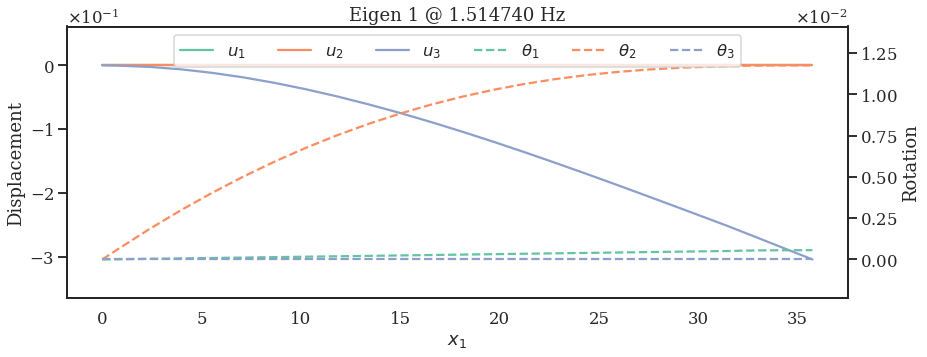

In [15]:
fig, ax = plt.subplots(figsize=(14, 5))

[hu1,] = ax.plot('x1', 'u1', '', data=df_evei_out_ns)
[hu2,] = ax.plot('x1', 'u2', '', data=df_evei_out_ns)
[hu3,] = ax.plot('x1', 'u3', '', data=df_evei_out_ns)
ax.margins(y=0.2)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0), useMathText=True)
ax.set_ylabel('Displacement')

ax2 = ax.twinx()
[hr1,] = ax2.plot('x1', 'r1', '', data=df_evei_out_ns, ls='--')
[hr2,] = ax2.plot('x1', 'r2', '', data=df_evei_out_ns, ls='--')
[hr3,] = ax2.plot('x1', 'r3', '', data=df_evei_out_ns, ls='--')
ax2.margins(y=0.2)
ax2.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0), useMathText=True)
ax2.set_ylabel('Rotation')

# ax.grid(axis='y')
ax.set_xlabel('$x_1$')
plt.title('Eigen {0:d} @ {1:f} Hz'.format(evi, evai_out[1]))
plt.legend(
    handles=[hu1, hu2, hu3, hr1, hr2, hr3],
    labels=['$u_1$', '$u_2$', '$u_3$', r'$\theta_1$', r'$\theta_2$', r'$\theta_3$'],
    ncol=6, loc='upper center', frameon=True
)
plt.show()